## Problem

For various reasons you may want to add a **legend with handles** that consist of squares or rectangles. For some plots, such as the ones obtained with `plt.fill_between()` the legend handle is going to be a rectangle by default (see [this example](https://python-graph-gallery.com/area-fill-between-two-lines-in-matplotlib)). 

However, for other types of charts, you will have to build them up from scratch.

## Example

Let's see this problem live with a scatterplot:

In [9]:
import palmerpenguins
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np

Load the data:

In [3]:
penguins = palmerpenguins.load_penguins().dropna()

Now we define a bunch of properties for the chart such as the colors and the list of species:

In [4]:
FLIPPER_LENGTH = penguins["flipper_length_mm"].values
BILL_LENGTH = penguins["bill_length_mm"].values

SPECIES = penguins["species"].values
SPECIES_ = np.unique(SPECIES)

COLORS = ["#1B9E77", "#D95F02", "#7570B3"]

The following code is extracted from the mentioned post on custom legends. Let's see what is the default legend we get for a scatterplot

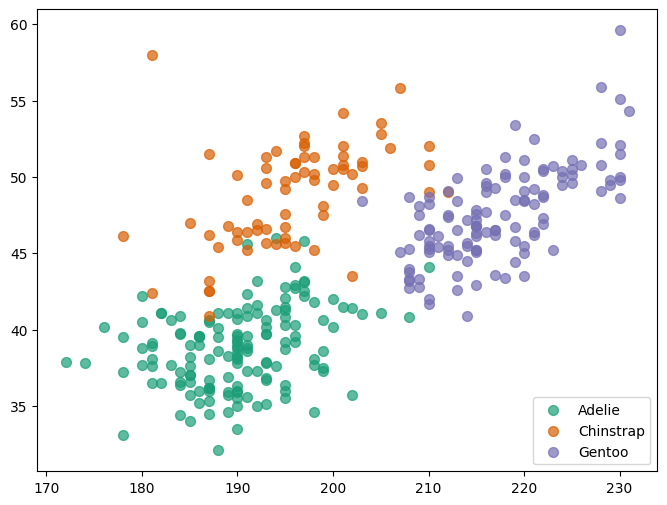

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
for species, color in zip(SPECIES_, COLORS):
    idxs = np.where(SPECIES == species)
    ax.scatter(
        FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs], label=species,
        s=50, color=color, alpha=0.7
    )
legend = ax.legend()

plt.show()

Here we are, a [scatterplot](https://python-graph-gallery.com/scatter-plot/) with circles used in the legend. How to use rectangles instead?

## Using rectangles in legend

Let's see how we can **override this default behavior** and use a rectangle instead. The following function is created to make it simpler to replicate the same plot several times.

In [7]:
def scatterplot():
    fig, ax = plt.subplots(figsize=(8, 6))
    for species, color in zip(SPECIES_, COLORS):
        idxs = np.where(SPECIES == species)
        ax.scatter(
            FLIPPER_LENGTH[idxs], BILL_LENGTH[idxs],
            s=50, color=color, alpha=0.7
        )
    return fig, ax

Let's generate the chart and create the handles for the legend. This is as simple as using `matplotlib.patches.Patch`.

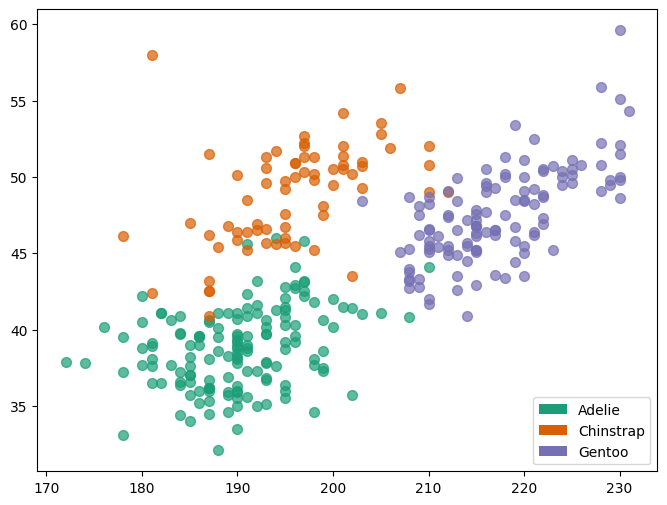

In [10]:
fig, ax = scatterplot()

handles = [
    Patch(facecolor=color, label=label) 
    for label, color in zip(SPECIES_, COLORS)
]

ax.legend(handles=handles)

plt.show()

## Customizing the rectangle

It's also possible to remove the fill and just **leave the color of the borders**.

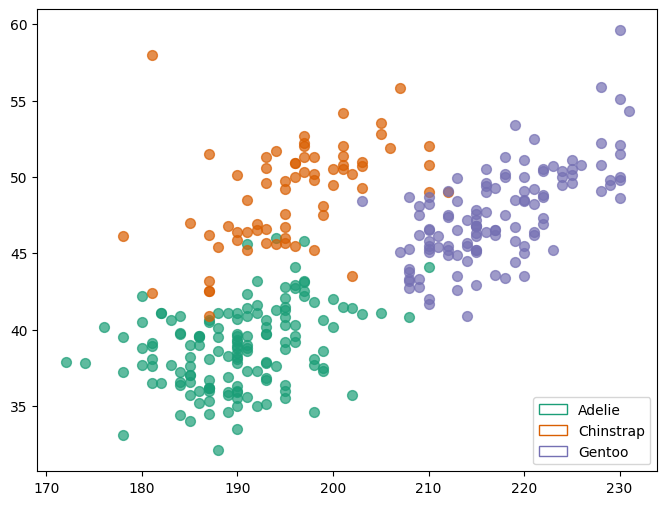

In [11]:
fig, ax = scatterplot()

handles = [
    Patch(edgecolor=color, label=label, fill=False) 
    for label, color in zip(SPECIES_, COLORS)
]

ax.legend(handles=handles);

## Different colors for fill and border

Or use one color for the fill, and **another for the border**:

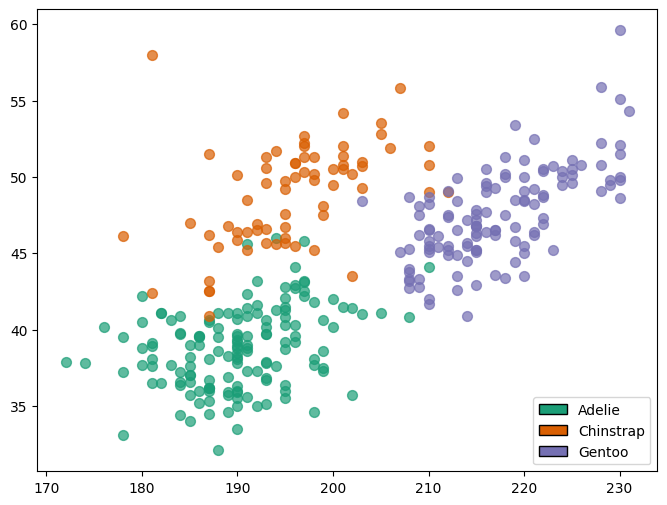

In [12]:
fig, ax = scatterplot()

handles = [
    Patch(facecolor=color, edgecolor="k", label=label) 
    for label, color in zip(SPECIES_, COLORS)
]

ax.legend(handles=handles)

plt.show()

## Change shape

And if you want to make them **squared**, you only need to set both `handlelength` and `handleheight` to the same value when creating the legend.

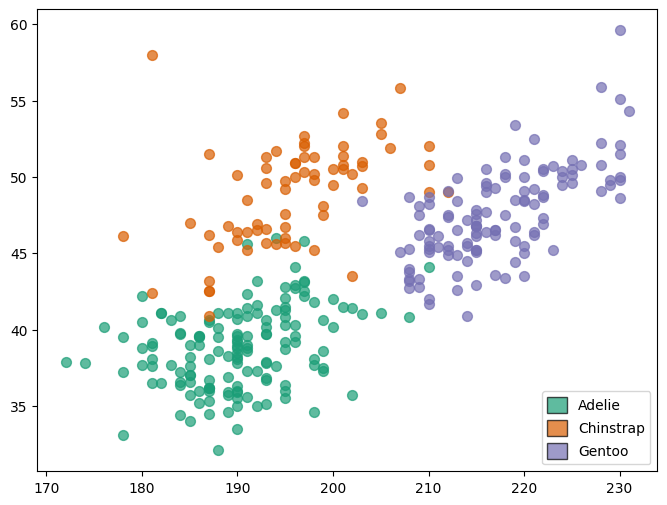

In [13]:
fig, ax = scatterplot()

handles = [
    Patch(facecolor=color, edgecolor="k", label=label, alpha=0.7) 
    for label, color in zip(SPECIES_, COLORS)
]

legend = ax.legend(handles=handles, handlelength=1.4, handleheight=1.4)

plt.show()

## Going further

This post explains how to use rectangles in the legend of a chart built with [matplotlib](https://python-graph-gallery.com/matplotlib/). 

You might be interested in how to [customize your layout](https://python-graph-gallery.com/534-highly-customized-layout/) and how to [customize title](https://python-graph-gallery.com/190-custom-matplotlib-title/).

<!-- ## Using FancyBboxPatch and BoxStyle

Some differences worth remark:

* The first three arguments are `xy`, `width` and `height`. These are not too important here because they're used for the legend. But they are relevant when including the `FancyBboxPatch` within the plot region.
* The edge has a black color by default, which is not the case with `Patch`.

Let's make the borders rounded:

TURNS OUT IT'S NOT POSSIBLE TO MAKE THEM ROUNDED -->